### ***`Imports`***


In [1]:
#!pip install colorama

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from colorama import Fore, Style
import seaborn as sns
import xgboost as xgb
import joblib
import pickle


from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category= ConvergenceWarning)

### ***`Read & Presenting Data`***

In [3]:
data= pd.read_csv('train.csv')
data.head(10)

,Unnamed: 0,id,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,owner_2_score,RATE_owner_2,CAP_AMOUNT_owner_2,PERCENT_OWN_owner_2,...,INPUT_VALUE_ID_FOR_avg_net_deposits,RATE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,RATE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id,completion_status
0,900,4813,606.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.000000,NaN,preferred,NaN,606.0,A,150000.0,100.0,4642.0,Paid off with renewal
1,329,1406,703.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,107027.250000,NaN,preferred,NaN,703.0,A,150000.0,100.0,1362.0,Paid in full
2,1035,7415,692.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.000000,NaN,preferred,NaN,692.0,A,150000.0,100.0,6485.0,Default
3,1670,6759,684.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.000000,NaN,preferred,NaN,684.0,A,150000.0,100.0,6035.0,Paid via discounted payoff
4,1726,5867,625.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.000000,NaN,preferred,NaN,625.0,A,150000.0,100.0,5299.0,Paid in full
5,1900,7491,677.0,A,150000.0,50.0,654.0,A,150000.0,50.0,...,407304.500000,NaN,preferred,NaN,665.0,A,150000.0,100.0,6518.0,Default
6,1885,9464,601.0,B,100000.0,100.0,NaN,NaN,NaN,NaN,...,78771.700000,NaN,preferred,NaN,601.0,B,100000.0,100.0,7777.0,Default
7,108,562,525.0,C,35000.0,100.0,NaN,NaN,NaN,NaN,...,20348.333333,NaN,preferred,NaN,525.0,C,35000.0,100.0,486.0,Paid off with renewal
8,951,6715,588.0,B,100000.0,100.0,NaN,NaN,NaN,NaN,...,15947.666667,NaN,preferred,NaN,588.0,B,100000.0,100.0,5972.0,Paid off with renewal
9,1335,3257,0.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,...,0.000000,NaN,preferred,NaN,0.0,NaN,NaN,0.0,3435.0,Paid off with renewal


In [4]:
shape =data.shape
print ("Shape Of data :", shape )
print(Fore.MAGENTA +Style.BRIGHT +"**************************************************************")
print(Style.RESET_ALL)
# Get the maximum length of column names for formatting
max_length = max([len(column) for column in data.columns])
# Summarize the number of rows with missing values for each column
for column in data.columns:
    # Count number of rows with missing values
    n_miss = data[column].isnull().sum()
    perc = n_miss / data.shape[0] * 100
    print(f'{column: <{max_length}}   Missing: {n_miss: <4}   ({perc:.1f}%)')


Shape Of data : (1810, 56)
**************************************************************

Unnamed: 0                                 Missing: 0      (0.0%)
id                                         Missing: 0      (0.0%)
owner_1_score                              Missing: 24     (1.3%)
RATE_owner_1                               Missing: 30     (1.7%)
CAP_AMOUNT_owner_1                         Missing: 35     (1.9%)
PERCENT_OWN_owner_1                        Missing: 17     (0.9%)
owner_2_score                              Missing: 1596   (88.2%)
RATE_owner_2                               Missing: 1596   (88.2%)
CAP_AMOUNT_owner_2                         Missing: 1608   (88.8%)
PERCENT_OWN_owner_2                        Missing: 1551   (85.7%)
owner_3_score                              Missing: 1800   (99.4%)
RATE_owner_3                               Missing: 1800   (99.4%)
CAP_AMOUNT_owner_3                         Missing: 1800   (99.4%)
PERCENT_OWN_owner_3                        M

In [5]:
shape =data.shape
print ("Shape Of data :", shape )
print("*************************")
data.isna().sum() 

Shape Of data : (1810, 56)
*************************


Unnamed: 0                                     0
id                                             0
owner_1_score                                 24
RATE_owner_1                                  30
CAP_AMOUNT_owner_1                            35
PERCENT_OWN_owner_1                           17
owner_2_score                               1596
RATE_owner_2                                1596
CAP_AMOUNT_owner_2                          1608
PERCENT_OWN_owner_2                         1551
owner_3_score                               1800
RATE_owner_3                                1800
CAP_AMOUNT_owner_3                          1800
PERCENT_OWN_owner_3                         1768
years_in_business                             16
RATE_ID_FOR_years_in_business                 16
fsr                                          495
RATE_ID_FOR_fsr                             1791
location                                      11
RATE_ID_FOR_location                          74
funded_last_30      

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1810 non-null   int64  
 1   id                                        1810 non-null   int64  
 2   owner_1_score                             1786 non-null   float64
 3   RATE_owner_1                              1780 non-null   object 
 4   CAP_AMOUNT_owner_1                        1775 non-null   float64
 5   PERCENT_OWN_owner_1                       1793 non-null   float64
 6   owner_2_score                             214 non-null    float64
 7   RATE_owner_2                              214 non-null    object 
 8   CAP_AMOUNT_owner_2                        202 non-null    float64
 9   PERCENT_OWN_owner_2                       259 non-null    float64
 10  owner_3_score                       

In [7]:
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns

def visualisation(data):
# Extract features and target
    X = data.drop('completion_status', axis=1)
    y = data['completion_status']

    # Calculate information gain for each feature
    ig = mutual_info_classif(X, y)

    # Print information gain for each feature
    plt.bar(X.columns, ig)

    # Add labels and title
    plt.xlabel('Feature')
    plt.ylabel('Information Gain')
    plt.title('Information Gain for Each Feature')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)
     
    # Show the plot
    plt.show()
    sns.heatmap(data.corr(),cmap='coolwarm')

    #def plot_categorical_distribution(df, column):
    plt.figure(figsize=(7, 7))  # Adjust the figure size as needed
    sns.histplot(data[column].dropna())
    plt.title(f'Distribution of {column}')
    plt.show()

### ***`Pre-Processing Function`***

In [8]:
def pre (loan):
  #********************************Drop*****************************************
  # Drop the column if it has more than 65% null values
  loan.drop(['Unnamed: 0','id'], axis=1, inplace=True)
  for col in loan.columns:
    pct_null = loan[col].isnull().sum() / len(loan) * 100
    if pct_null > 65:
        loan.drop(col, axis=1, inplace=True)


  #********************************fill null*****************************************
  # Check if the column is not of object type 
  # fill null values with mean for numeric columns if percentage is greater than or equal to 7%
  # Then fill null values with mode for non-numeric columns

  knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
  mean_values = {}
  mode_values = {}

  for col in loan.columns:
      if loan[col].dtype != 'object' :
          null_percentage = loan[col].isnull().sum() / len(loan) * 100
          if null_percentage < 1.5:
              imputed_col = knn_imputer.fit_transform(loan[col].values.reshape(-1, 1))
              loan[col] = imputed_col
              mean_values[col] = imputed_col
              
              # with open('imputer.pkl', 'wb') as f:
              #   pickle.dump(imputed_col, f)
              

          else:
              mean = loan[col].mean()
              loan[col] = loan[col].fillna(mean)
              mean_values[col] = mean
      elif loan[col].isnull().sum() / len(loan) * 100 < 10:
          mode = loan[col].mode()[0]
          loan[col] = loan[col].fillna(mode)
          mode_values[col] = mode

     

  #********************************encoding******************************************
  numerical_cols = []
  non_numerical_cols = []
  label_encodersss={}
  for col in loan.columns:
    if loan[col].dtype != 'object':
        numerical_cols.append(col)
    else:
        non_numerical_cols.append(col)
  
 
  for col in non_numerical_cols:
      label_encoder = preprocessing.LabelEncoder()
      loan[col] = label_encoder.fit_transform(loan[col].values.reshape(-1, 1))
      label_encodersss[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))



      
    
  visualisation(loan)

  # with open('label_encoder.pkl', 'wb') as f:
  #   pickle.dump(label_encoder, f)
    
  # import pickle
  # from sklearn.preprocessing import OrdinalEncoder


  # label_encoder = OrdinalEncoder()
  # label_encoder.fit(X)


  #********************************handel null value >10% with Decision Tree Classifier ******************************************
  # Check if the column is numeric and has more than 10% NaN values        
  # Separate rows with missing values in the column       
  # Separate rows with missing values in the column 
  # Separate rows with missing values in the column then Concatenate the filled and complete dataframes

  # for col in loan.columns:
  #   if loan[col].dtype != 'object' and loan[col].isnull().sum() / len(loan) * 100 > 10:

  #       missing_fsr = loan[loan[col].isnull()]
  #       complete_fsr = loan[~loan[col].isnull()]
  #       X_train = complete_fsr.drop(columns=[col])
  #       y_train = complete_fsr[col]

  #       model = DecisionTreeClassifier()
  #       model.fit(X_train, y_train)
  #       X_missing_fsr = missing_fsr.drop(columns=[col])
  #       predicted_fsr = model.predict(X_missing_fsr)
  #       missing_fsr[col] = predicted_fsr
  #       filled = pd.concat([complete_fsr, missing_fsr])
  #       loan = filled
        #loan_pre = pd.concat([filled, loan[~loan['fsr'].isnull()]])



  #********************************Feature Selection:******************************************
  # Compute the correlation matrix
  # Compute the correlation between the correlation matrix
  # Compute the correlation between the correlation matrix 
  # Collect columns with high correlation 
  # Drop columns that are not in high_corr_values

  loan1 = loan.drop("completion_status", axis=1).corr()
  data = loan1.corr()
  high_corr = np.logical_and(data > 0.1, data < 1)

  high_corr_values = []
  for row in high_corr.index:
      for col in high_corr.columns:
          if high_corr.loc[row, col]:
              high_corr_values.append(col)

  columns_to_drop = [col for col in loan1.columns if col not in high_corr_values]

  for col in loan1:
    if col not in high_corr_values:
        loan.drop(col, axis=1, inplace=True)



  loan.to_csv('Data_After_Pre.csv', index=False)

  return loan , mean_values , mode_values , label_encodersss 

### ***`call Pre-Processing `***

c:\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

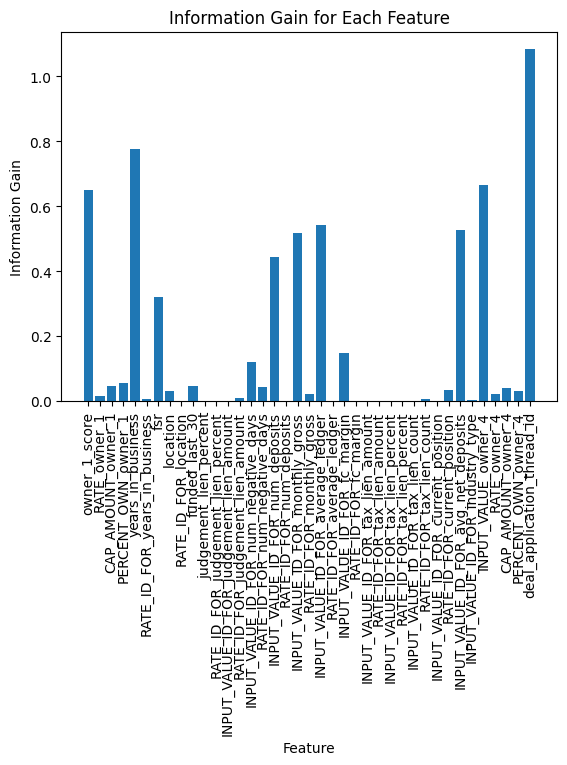

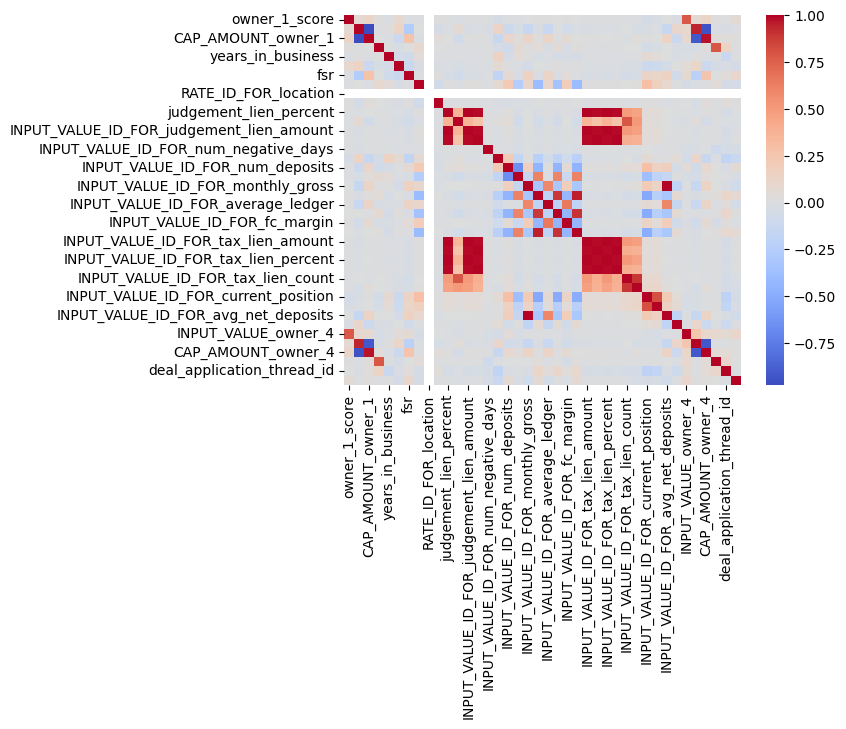

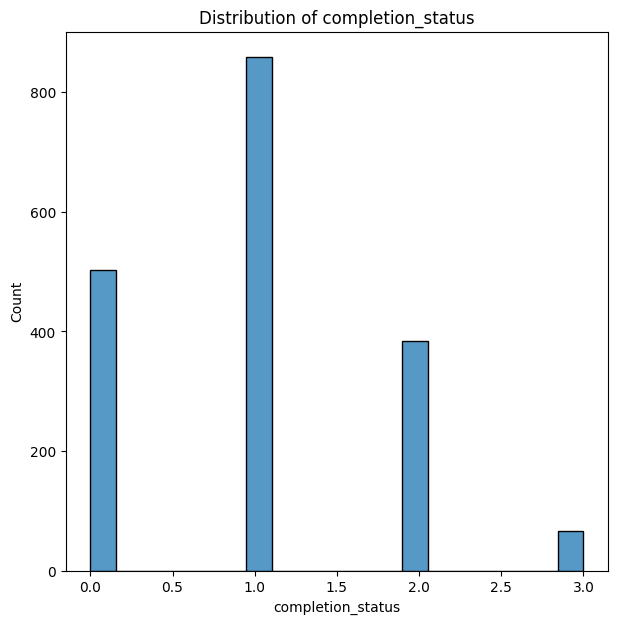

In [9]:
data , mean_values , mode_values , label_encodersss = pre(data)

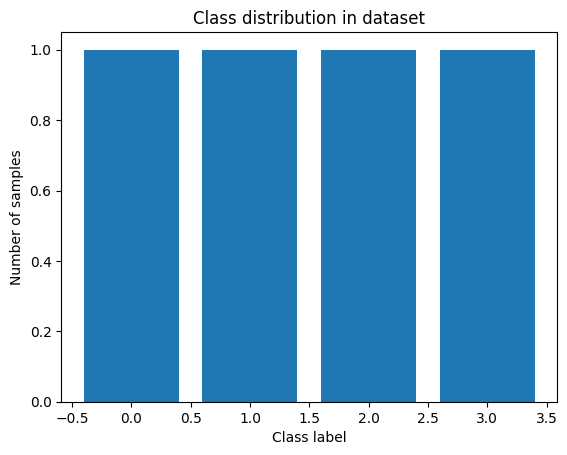

In [10]:
d=data["completion_status"].unique()
import matplotlib.pyplot as plt
unique_labels, counts = np.unique(d, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

In [11]:
data.shape


(1810, 37)

In [12]:
shape =data.shape
print ("Shape Of data :", shape )
print("*************************")
data.isna().sum() 

Shape Of data : (1810, 37)
*************************


owner_1_score                               0
RATE_owner_1                                0
CAP_AMOUNT_owner_1                          0
PERCENT_OWN_owner_1                         0
years_in_business                           0
RATE_ID_FOR_years_in_business               0
fsr                                         0
location                                    0
judgement_lien_percent                      0
RATE_ID_FOR_judgement_lien_percent          0
INPUT_VALUE_ID_FOR_judgement_lien_amount    0
RATE_ID_FOR_judgement_lien_amount           0
RATE_ID_FOR_num_negative_days               0
INPUT_VALUE_ID_FOR_num_deposits             0
RATE_ID_FOR_num_deposits                    0
INPUT_VALUE_ID_FOR_monthly_gross            0
RATE_ID_FOR_monthly_gross                   0
INPUT_VALUE_ID_FOR_average_ledger           0
RATE_ID_FOR_average_ledger                  0
INPUT_VALUE_ID_FOR_fc_margin                0
RATE_ID_FOR_fc_margin                       0
INPUT_VALUE_ID_FOR_tax_lien_amount

### ***`Models Function:`***

##### model only

In [13]:
def Models (loan):
  X_tv = loan.drop("completion_status", axis = 1).copy()
  y_tv = loan["completion_status"].copy()

  # scaler = StandardScaler()
  # X_tv = scaler.fit_transform(X_tv)

  X_train, X_test, y_train, y_test = train_test_split(X_tv, y_tv, test_size=0.2,random_state=101)


  models = [
    xgb.XGBClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    # SVC(),
   
    

  ]

  for model in models:

      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)


      
      acc = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred, average='macro')
      recall = recall_score(y_test, y_pred, average='macro')
      f1 = f1_score(y_test, y_pred, average='macro')
      conf_matrix = confusion_matrix(y_test, y_pred)
      print(Fore.GREEN  + Style.BRIGHT + f"Model: {model.__class__.__name__}, Accuracy: {acc}")
      print(Style.RESET_ALL)
      print("acc:", round(acc*100, 2), '%')   
      print("Precision:", round(precision*100, 2), '%')
      print("Recall:", round(recall*100, 2), '%')
      print("F1 score:", round(f1*100, 2), '%')
      print("Confusion matrix:\n", conf_matrix)
      print(Fore.RED + Style.BRIGHT +"**************************************************************")
      print(Fore.BLUE +Style.BRIGHT +"**************************************************************")
      print(Fore.MAGENTA +Style.BRIGHT +"**************************************************************")
      print(Style.RESET_ALL)

#####model with GridSearchCV




In [14]:
def Model_Grid(loan):
    X_tv = loan.drop("completion_status", axis=1).copy()
    y_tv = loan["completion_status"].copy()

    # scaler = StandardScaler()
    # X_tv = scaler.fit_transform(X_tv)

    X_train, X_test, y_train, y_test = train_test_split(X_tv, y_tv, test_size=0.2, random_state=101)

    models = [
    {"model": xgb.XGBClassifier(), "params": {"n_estimators": [100, 200, 300],'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.5, 0.001,0.8]}},
    {"model": GradientBoostingClassifier(),"params": {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 0.8]}},
    {"model": DecisionTreeClassifier(), "params": {"max_depth": [None, 5, 10], "min_samples_split": [2, 5], "criterion": ["gini", "entropy"]}},
    {"model": RandomForestClassifier(), "params": {"n_estimators": [100, 200, 300], "max_depth": [None, 5, 10], "min_samples_split": [2, 5]}},
    # {"model": SVC(), "params": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": [1, 0.1, 0.01, 0.001, 0.0001]}}
]

    for model_info in models:
        model = model_info["model"]
        params = model_info["params"]

        grid_search = GridSearchCV(model, params, scoring="accuracy",cv=2)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        y_pred = best_model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        conf_matrix = confusion_matrix(y_test, y_pred)

        print(Fore.GREEN + Style.BRIGHT + f"Model: {best_model.__class__.__name__}, Accuracy: {acc}")
        print(Style.RESET_ALL)
        print("Accuracy:", round(acc * 100, 2), '%')
        print("Precision:", round(precision * 100, 2), '%')
        print("Recall:", round(recall * 100, 2), '%')
        print("F1 score:", round(f1 * 100, 2), '%')
        print("Confusion matrix:\n", conf_matrix)
        print(Fore.GREEN + Style.BRIGHT + "Best Parameters:", grid_search.best_params_)
        print(Fore.RED + Style.BRIGHT + "**************************************************************")
        print(Fore.BLUE + Style.BRIGHT + "**************************************************************")
        print(Fore.MAGENTA + Style.BRIGHT + "**************************************************************")
        print(Style.RESET_ALL)


        joblib.dump(best_model, f"{best_model.__class__.__name__}_model.joblib")


### ***`call models`***

##### model only

In [15]:
Models(data)

Model: XGBClassifier, Accuracy: 0.9779005524861878

acc: 97.79 %
Precision: 98.51 %
Recall: 97.92 %
F1 score: 98.2 %
Confusion matrix:
 [[107   2   1   0]
 [  1 154   0   0]
 [  0   4  77   0]
 [  0   0   0  16]]
**************************************************************
**************************************************************
**************************************************************

Model: GradientBoostingClassifier, Accuracy: 0.9116022099447514

acc: 91.16 %
Precision: 92.41 %
Recall: 90.44 %
F1 score: 91.24 %
Confusion matrix:
 [[ 98   6   5   1]
 [  4 151   0   0]
 [  1  14  66   0]
 [  0   1   0  15]]
**************************************************************
**************************************************************
**************************************************************

Model: DecisionTreeClassifier, Accuracy: 0.9226519337016574

acc: 92.27 %
Precision: 89.43 %
Recall: 92.39 %
F1 score: 90.73 %
Confusion matrix:
 [[100   4   3   3]
 [  4 145   5  

##### with GridSearchCV

In [16]:
Model_Grid(data)

Model: XGBClassifier, Accuracy: 0.9806629834254144

Accuracy: 98.07 %
Precision: 98.84 %
Recall: 98.07 %
F1 score: 98.42 %
Confusion matrix:
 [[109   1   0   0]
 [  1 154   0   0]
 [  0   5  76   0]
 [  0   0   0  16]]
Best Parameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
**************************************************************
**************************************************************
**************************************************************

Model: GradientBoostingClassifier, Accuracy: 0.9696132596685083

Accuracy: 96.96 %
Precision: 97.74 %
Recall: 96.04 %
F1 score: 96.86 %
Confusion matrix:
 [[107   1   2   0]
 [  3 152   0   0]
 [  0   4  77   0]
 [  0   1   0  15]]
Best Parameters: {'learning_rate': 0.5, 'n_estimators': 200}
**************************************************************
**************************************************************
**************************************************************

Model: DecisionTreeClassifier, 


###***`Test Script`***

In [17]:
def model_evaluation (test_labels, test_predictions):
    accuracy = accuracy_score(test_labels, test_predictions)
    precision = precision_score(test_labels, test_predictions,average='micro')
    recall = recall_score(test_labels, test_predictions,average='micro')
    f1 = f1_score(test_labels, test_predictions,average='micro')
    confusion_mat = confusion_matrix(test_labels, test_predictions)

    print("acc:", round(accuracy*100, 2), '%')   
    print("Precision:", round(precision*100, 2), '%')
    print("Recall:", round(recall*100, 2), '%')
    print("F1 score:", round(f1*100, 2), '%')
    print("Confusion matrix:\n", confusion_mat)
    print(Fore.RED + Style.BRIGHT +"**************************************************************")
    print(Fore.BLUE +Style.BRIGHT +"**************************************************************")
    print(Fore.MAGENTA +Style.BRIGHT +"**************************************************************")
    print(Style.RESET_ALL)

In [18]:
def test_data (test , data , mean_values , mode_values , label_encodersss):
   
   
    # with open('imputer.pkl', 'rb') as f:
    #   imputer = pickle.load(f)

    for col in test:
      if col not in data.columns:
        test.drop(col, axis=1, inplace=True)
    
    numerical_cols = []
    non_numerical_cols = []

    for col in test.columns:
      if test[col].dtype != 'object':
          numerical_cols.append(col)
      else:
          non_numerical_cols.append(col)



    for col in test:
      if test[col].dtype != 'object' :
         test[col].fillna(mean_values.get(col).mean(), inplace=True)
      else :
          test[col].fillna(mode_values.get(col) , inplace=True)

    # with open('label_encoder.pkl', 'rb') as f:
    #     label_encoder = pickle.load(f)

    for col in test:
       if test[col].dtype == 'object' :
          label_object = label_encodersss.get(col)
          test[col] = test[col].apply(lambda x: label_object.get(x, -1))
          #test[col] = encoder_object.transform(test[col].values.reshape(-1, 1))
     
    y_test = test['completion_status']
    X_test = test.drop(['completion_status'],axis=1)

    xgb_model = joblib.load("XGBClassifier_model.joblib")
    Gradien_model = joblib.load("GradientBoostingClassifier_model.joblib")
    dt_model = joblib.load("DecisionTreeClassifier_model.joblib")
    rf_model = joblib.load("RandomForestClassifier_model.joblib")
    # svc_model = joblib.load("SVC_model.joblib")

    models = [xgb_model,Gradien_model, dt_model, rf_model]
    model_names = ["XGBClassifier","GradientBoostingClassifier" ,"DecisionTreeClassifier", "RandomForestClassifier"]

    for model, model_name in zip(models, model_names):
        y_pred = model.predict(X_test)
        print(Fore.RED + Style.BRIGHT ,model_name)
        print(Style.RESET_ALL)
        model_evaluation (y_test, y_pred)


In [ ]:
tst_df= pd.read_csv('ex_test.csv')

In [ ]:
test_data (tst_df , data , mean_values , mode_values,label_encodersss)

 XGBClassifier

acc: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1 score: 100.0 %
Confusion matrix:
 [[5 0 0 0]
 [0 4 0 0]
 [0 0 7 0]
 [0 0 0 3]]
**************************************************************
**************************************************************
**************************************************************

 GradientBoostingClassifier

acc: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1 score: 100.0 %
Confusion matrix:
 [[5 0 0 0]
 [0 4 0 0]
 [0 0 7 0]
 [0 0 0 3]]
**************************************************************
**************************************************************
**************************************************************

 DecisionTreeClassifier

acc: 100.0 %
Precision: 100.0 %
Recall: 100.0 %
F1 score: 100.0 %
Confusion matrix:
 [[5 0 0 0]
 [0 4 0 0]
 [0 0 7 0]
 [0 0 0 3]]
**************************************************************
**************************************************************
**********************************

###***`pca`***

In [20]:
# Import necessary libraries
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

<Axes: >

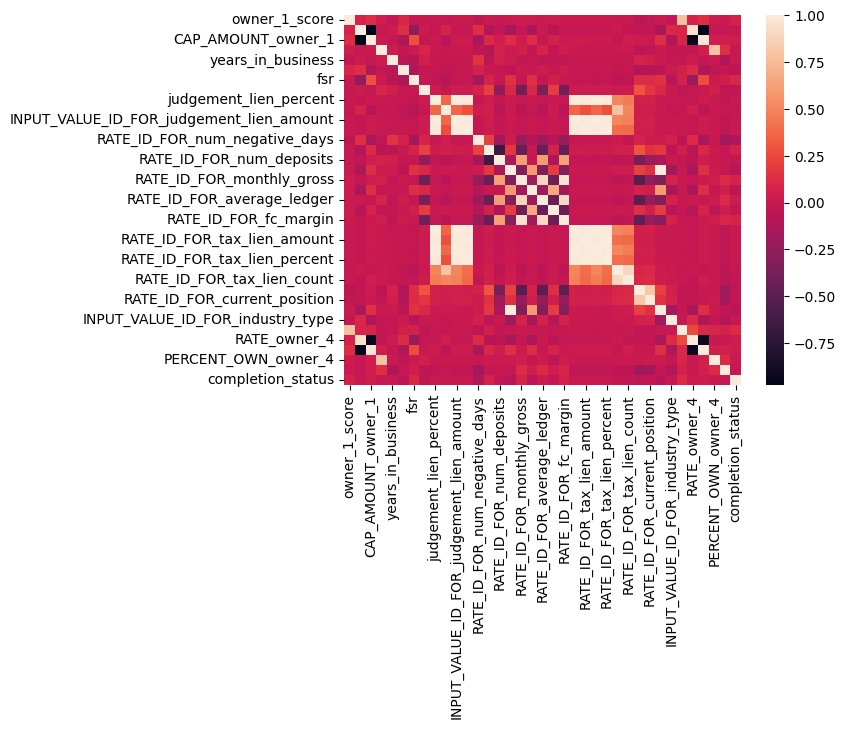

In [21]:
#Check the Co-relation between features without PCA
sns.heatmap(data.corr())

In [22]:
x_pca = data.drop("completion_status", axis = 1).copy()
y_pca = data["completion_status"].copy()

In [45]:
x_pca.shape

(1810, 36)

In [49]:
#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(x_pca)
data_pca = pca.transform(x_pca)
##data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca

array([[-124630.43850154,  -52173.76480928,   -2392.52182382],
       [  29943.15856862,  -46923.56458235,   15538.85914713],
       [-124630.80130979,  -52176.78256705,   -2385.59418241],
       ...,
       [ -16356.98992993,   22818.95478261,     829.21103803],
       [ -83178.62238311,  -50391.03911145,   -5036.19752497],
       [ -97160.20360749,   19605.68580543,     890.39412922]])

<Axes: >

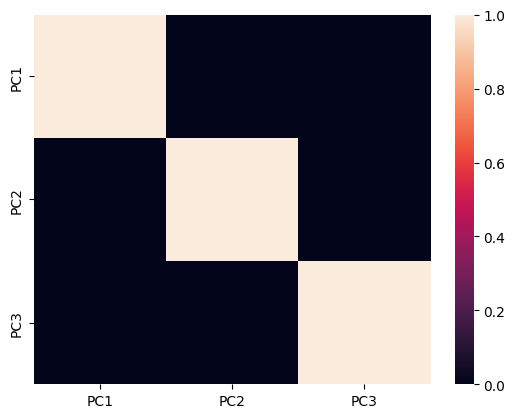

In [24]:
#Checking Co-relation between features after PCA
temp_pca =  pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
sns.heatmap(temp_pca.corr())

In [25]:

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y_pca, test_size=0.33, random_state=42)

In [50]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train_pca, y_train_pca)
y_pred_pca = model.predict(X_test_pca)

In [51]:
model_evaluation(y_test_pca,y_pred_pca)

acc: 95.82 %
Precision: 95.82 %
Recall: 95.82 %
F1 score: 95.82 %
Confusion matrix:
 [[160  10   2   0]
 [  3 264   3   0]
 [  1   5 128   0]
 [  0   1   0  21]]
**************************************************************
**************************************************************
**************************************************************



In [43]:
np_pca = pd.DataFrame(x_pca)
np_pca

,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,years_in_business,RATE_ID_FOR_years_in_business,fsr,location,judgement_lien_percent,RATE_ID_FOR_judgement_lien_percent,...,RATE_ID_FOR_tax_lien_count,INPUT_VALUE_ID_FOR_current_position,RATE_ID_FOR_current_position,INPUT_VALUE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id
0,606.0,0,150000.0,100.0,2.07,0,39.80076,1,0.0,0,...,0,0.0,0,0.000000,2,606.0,0,150000.0,100.0,4642.0
1,703.0,0,150000.0,100.0,26.57,0,73.00000,3,0.0,0,...,0,1.0,0,107027.250000,2,703.0,0,150000.0,100.0,1362.0
2,692.0,0,150000.0,100.0,42.10,0,19.00000,1,0.0,0,...,0,0.0,0,0.000000,2,692.0,0,150000.0,100.0,6485.0
3,684.0,0,150000.0,100.0,5.53,0,39.80076,1,0.0,0,...,0,0.0,0,0.000000,2,684.0,0,150000.0,100.0,6035.0
4,625.0,0,150000.0,100.0,1.65,1,39.80076,1,0.0,0,...,0,0.0,0,0.000000,2,625.0,0,150000.0,100.0,5299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,582.0,1,100000.0,100.0,1.11,1,39.80076,3,0.0,0,...,0,1.0,0,32607.647500,3,582.0,1,100000.0,100.0,3605.0
1806,539.0,2,35000.0,100.0,4.45,0,6.00000,3,0.0,0,...,0,0.0,0,30153.000000,2,539.0,2,35000.0,100.0,3856.0
1807,584.0,1,100000.0,100.0,7.83,0,35.00000,3,0.0,0,...,0,2.0,1,78056.400000,2,584.0,1,100000.0,100.0,4105.0
1808,650.0,0,150000.0,100.0,5.54,0,4.00000,3,0.0,0,...,0,2.0,1,29348.000000,2,650.0,0,150000.0,100.0,2133.0


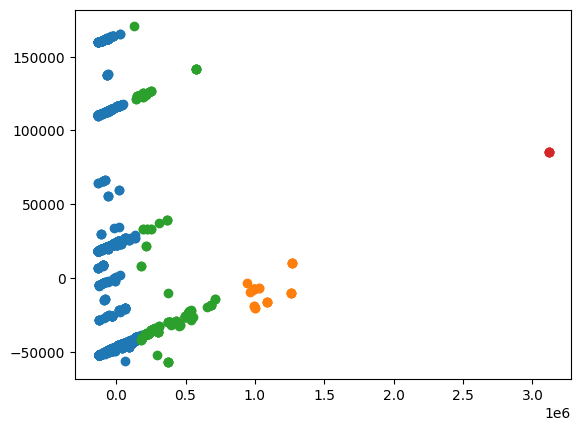

In [52]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define the model
birch = Birch(threshold=0.01, n_clusters=4)
# fit the model
birch.fit(data_pca)
# assign a cluster to each example
yhat = birch.predict(data_pca)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(data_pca[row_ix, 0], data_pca[row_ix, 1])
# show the plot
pyplot.show()

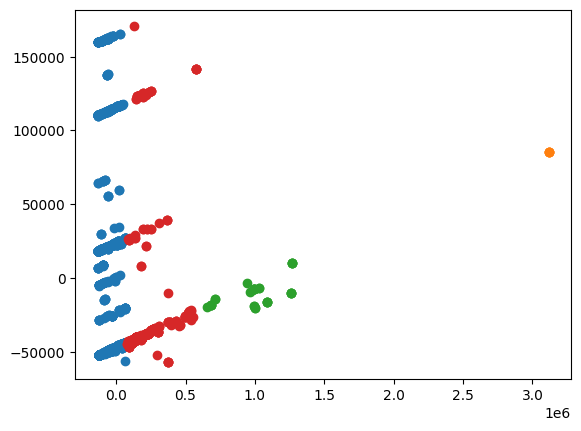

In [53]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define the model
kmeans = KMeans(n_clusters=4)
# fit the model
kmeans.fit(data_pca)
# assign a cluster to each example
yhat = kmeans.predict(data_pca)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 pyplot.scatter(data_pca[row_ix, 0], data_pca[row_ix, 1])
# show the plot
pyplot.show()

In [29]:
from sklearn.metrics import adjusted_rand_score
kmeans_y_pred = kmeans.labels_
ari = adjusted_rand_score(y_pca,kmeans_y_pred)
print("KMeans ARI:", ari)

KMeans ARI: 0.01545773557635438


In [30]:
from sklearn.metrics import adjusted_rand_score
birch_y_pred = birch.labels_
ari = adjusted_rand_score(y_pca,birch_y_pred)
print("KMeans ARI:", ari)

KMeans ARI: 0.00529251117244784


In [66]:
frames = [temp_pca, y_pca]
result = pd.concat(frames, axis=1, join='inner')


In [64]:
Model_Grid(result)

Model: XGBClassifier, Accuracy: 0.8922651933701657

Accuracy: 89.23 %
Precision: 91.39 %
Recall: 87.63 %
F1 score: 89.23 %
Confusion matrix:
 [[ 95   9   6   0]
 [  9 140   6   0]
 [  1   5  75   0]
 [  1   2   0  13]]
Best Parameters: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 100}
**************************************************************
**************************************************************
**************************************************************

Model: GradientBoostingClassifier, Accuracy: 0.9005524861878453

Accuracy: 90.06 %
Precision: 90.28 %
Recall: 88.09 %
F1 score: 89.07 %
Confusion matrix:
 [[ 99   4   7   0]
 [  8 141   5   1]
 [  1   7  73   0]
 [  1   2   0  13]]
Best Parameters: {'learning_rate': 0.5, 'n_estimators': 200}
**************************************************************
**************************************************************
**************************************************************

Model: DecisionTreeClassifier, 

In [65]:
Models(result)

Model: XGBClassifier, Accuracy: 0.8812154696132597

acc: 88.12 %
Precision: 90.61 %
Recall: 86.28 %
F1 score: 88.12 %
Confusion matrix:
 [[ 91  11   8   0]
 [  6 143   6   0]
 [  2   7  72   0]
 [  1   2   0  13]]
**************************************************************
**************************************************************
**************************************************************

Model: GradientBoostingClassifier, Accuracy: 0.7651933701657458

acc: 76.52 %
Precision: 81.86 %
Recall: 73.76 %
F1 score: 76.5 %
Confusion matrix:
 [[ 72  34   4   0]
 [  6 142   5   2]
 [  1  29  51   0]
 [  3   1   0  12]]
**************************************************************
**************************************************************
**************************************************************

Model: DecisionTreeClassifier, Accuracy: 0.9033149171270718

acc: 90.33 %
Precision: 89.2 %
Recall: 88.56 %
F1 score: 88.83 %
Confusion matrix:
 [[ 97   8   5   0]
 [  7 141   5   